In [1]:
###########################################
# Computing Convolutions in one dimension #
###########################################

In [2]:
#Calculation convolutions by hand compared to numpy
import numpy as np

def convld(x, w, p = 0, s = 1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape = p)
        x_padded = np.concatenate([zero_pad,
                                  x_padded,
                                  zero_pad])
    res = []
    for i in range(0, int(len(x) / s), s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] *
                         w_rot))
        
    return np.array(res)

## Testing
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Convld Implimentation:',
     convld(x, w, p = 2, s = 1))

print('NumPy Results:', 
     np.convolve(x, w, mode = 'same')) # same is the main impentation used


Convld Implimentation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
NumPy Results: [ 5 14 16 26 24 34 19 22]


In [3]:
###########################################
# Performing a discrete convolution in 2D #
###########################################

In [11]:
import numpy as np
import scipy.signal

def conv2d(X, W, p = (0, 0), s = (1, 1)):
    W_rot = np.array(W)[::-1, ::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2 * p[0]
    n2 = X_orig.shape[1] + 2 * p[1]
    X_padded = np.zeros(shape = (n1, n2))
    X_padded[p[0]:p[0] + X_orig.shape[0],
            p[1]:p[1] + X_orig.shape[1]] = X_orig
    
    res = []
    for i in range(0, int((X_padded.shape[0] - 
                          W_rot.shape[0]) / s[0]) + 1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] -
                              W_rot.shape[1]) / s[1]) + 1, s[1]):
            X_sub = X_padded[i:i + W_rot.shape[0],
                            j:j+ W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
            
    return(np.array(res))

In [12]:
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

In [13]:
print('Conv2d Implimentation:\n',
     conv2d(X, W, p=(1, 1), s = (1, 1)))

Conv2d Implimentation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]


In [14]:
print('SciPy Results:\n',
     scipy.signal.convolve2d(X, W, mode = 'same'))

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


In [ ]:
#########################
# Reading an image file #
#########################

In [1]:
#Reading via tensorflow
import tensorflow as tf

img_raw = tf.io.read_file('example-image.png')
img = tf.image.decode_image(img_raw)
print('Image shape:', img.shape) # shape is 252, 221, 3 - 3 is the number of channels - rgb

Image shape: (252, 221, 3)


In [2]:
# Reading via imageio
import imageio

img = imageio.imread('example-image.png')
print('Image shape:', img.shape)

print('Number of channels:', img.shape[2])
print('Image data type:', img.dtype)
print(img[100:102, 100:102, :])

Image shape: (252, 221, 3)
Number of channels: 3
Image data type: uint8
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


In [ ]:
###################################
# Regularizing an NN with dropout #
###################################

In [3]:
# If we wanted to include an L2 penalty to NN
# just need to add kernel_regularizer term
from tensorflow import keras

conv_layer = keras.layers.Conv2D(
    filters = 16,
    kernel_size=(3, 3),
    kernel_regularizer=keras.regularizers.l2(0.001))

fc_layers = keras.layers.Dense(
    units = 16,
    kernel_regularizer=keras.regularizers.l2(0.001))

In [ ]:
######################################
# Loss Functions for Classifications #
######################################

In [4]:
# How to use the three loss functions with two different formats
# the three loss functions are: BinaryCrossEntropy, CategoricalCrossentropy
# and Sparse CategoricalCrossentropy - Sparse does not use one-hot encoding for labels

import tensorflow_datasets as tfds

### Binary Crossentropy
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)

tf.print('BCE (w Probas): {:.4f}'.format(
    bce_probas(y_true = [1], y_pred = probas)),
    '(w logits): {:.4f}'.format(
    bce_logits(y_true = [1], y_pred = logits)))

BCE (w Probas): 0.3711 (w logits): 0.3711


In [7]:
### Categorical Crossentropy
cce_probas = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print(
    'CCE (w Probas): {:.4f}'.format(
        cce_probas(y_true = [[0, 0, 1]], y_pred = probas)),
    '(w Logits): {:.4f}'.format(
        cce_logits(y_true = [[0, 0, 1]], y_pred = logits)))



CCE (w Probas): 0.5996 (w Logits): 0.5996


In [8]:
### Sparse Categorical Crossentropy
sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True)

tf.print(
    'Sparse CEE (w Probas): {:.4f}'.format(
        sp_cce_probas(y_true = [2], y_pred = probas)),
    '(w Logits): {:.4f}'.format(
        sp_cce_logits(y_true = [2], y_pred = logits)))

Sparse CEE (w Probas): 0.5996 (w Logits): 0.5996


In [ ]:
############################################
# Implimenting a deep CNN using TensorFlow #
############################################

In [1]:
# Loading and preprocessing the data

import tensorflow_datasets as tfds

#Loading the data

mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()

datasets = mnist_bldr.as_dataset(shuffle_files = False)

mnist_train_orig = datasets['train']
mnist_test_orig = datasets['test']



In [2]:
# Splitting training and validation sets
import tensorflow as tf

BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                 tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32) / 255.0,
                 tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size = BUFFER_SIZE,
                                 reshuffle_each_iteration = False)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

In [ ]:
###############################
# Constructing a CNN in Keras # 
###############################

In [ ]:
# After doing the above - we can now move on to construct the CNN model

# Input: [batchsize x 28 x 28 x 1] - 1 being the channel
# Conv_1: [batchsize x 28 x 28 x 32] - number of filters is 32 - regularly use 32, 64, 128
# Pooling_1: [batchsize x 14 x 14 x 32] - pooling with either Maxpool or avgpool - reduces feature map size
# Conv_2: [batchsize x 14 x 14 x 64] - doubling the number of filters in second conv is standard
# Pooling_2: [batchsize x 7 x 7 x 64] - same the pooling above
# FC_1: [batchsize x 1024] - first fully connected layer (Dense) 
# FC_2 and softmax layer: [batchsize x 10] - final fully connected layer with softmax applied to the output

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters = 32, kernel_size = (5,5),
    strides = (1,1), padding = 'same',
    data_format='channels_last',
    name = 'conv_1', activation = 'relu')) # First convolution layer - 5 x 5 kernel size

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2, 2), name = 'pool_1')) # First MaxPooling layer - 2 x 2 pool size reduces dimensionality in half

model.add(tf.keras.layers.Conv2D(
    filters = 64, kernel_size = (5, 5),
    strides = (1, 1), padding = 'same',
    name = 'conv_2', activation = 'relu')) # No need to specify the data_format in second Conv2D layer

model.add(tf.keras.layers.MaxPool2D(
    pool_size = (2, 2), name = 'pool_2'))

#Default stride for MaxPool2D is set equal to the pooling size - so here it is 2

In [6]:
#Computing the size of the feature maps
model.compute_output_shape(input_shape=(16, 28, 28, 1))

# The first dimension corresponds to the batch dimension size - arbitrary at 16
# the resulting shape has 64 channels and a spatial size of 7x7

TensorShape([16, 7, 7, 64])

In [7]:
#The next step is to add the fully connected dense layers
# for implimenting the classifier on top of the current model
# Input must be of rank 2 shape [batchsize x input_units]
# We need to flatten the output (see shape above) to be rank2

model.add(tf.keras.layers.Flatten())
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [8]:
# The shape of (16, 3136) shows the input is now correct
# Next we add the two dense layers with a dropout layer in between

model.add(tf.keras.layers.Dense(
    units = 1024, name = 'fc_1',
    activation = 'relu'))

model.add(tf.keras.layers.Dropout(
    rate = 0.5))

model.add(tf.keras.layers.Dense(
    units = 10, name = 'fc_2',
    activation = 'softmax')) #10 out units to match the 10 class labels in the dataset
# softmax provides the class-membership probabilities of each input example

In [9]:
#We will use the SparseCategoricalEntropy for our loss because the data is sparse (integer and not one-hot coding) 
# and is multiclass

#We will also call build() method for late variable creation 
# We will then compile the model

tf.random.set_seed(1)
model.build(input_shape = (None, 28, 28, 1)) # None is the batch size
model.compile(
    optimizer=tf.keras.optimizers.Adam(), # Adam is a robust, gradient-based method suited to nonconvex ML problems
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']) 

In [10]:
#Now is time to fit the model using .fit() method
# Will use the validation dataset to monitor the learning progress

history = model.fit(mnist_train, epochs=NUM_EPOCHS,
                   validation_data=mnist_valid,
                   shuffle=True)

Epoch 1/20
782/782 [==============================] - 98s 126ms/step - loss: 0.1373 - accuracy: 0.9577 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 2/20
782/782 [==============================] - 108s 139ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0384 - val_accuracy: 0.9879
Epoch 3/20
782/782 [==============================] - 144s 184ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0431 - val_accuracy: 0.9867
Epoch 4/20
782/782 [==============================] - 142s 182ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0347 - val_accuracy: 0.9893
Epoch 5/20
782/782 [==============================] - 151s 193ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0482 - val_accuracy: 0.9873
Epoch 6/20
782/782 [==============================] - 154s 197ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0462 - val_accuracy: 0.9887
Epoch 7/20
782/782 [==============================] - 143s 183ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0530 - 

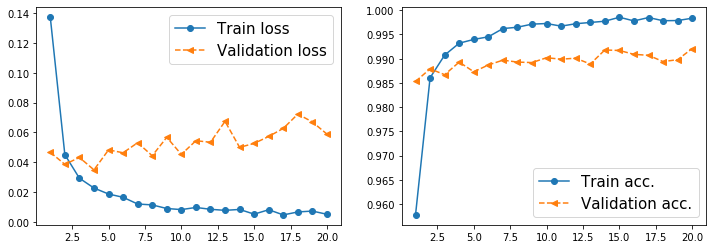

In [12]:
#Visualizing the learning curve

import matplotlib.pyplot as plt
import numpy as np

hist = history.history
x_arr = np.arange(len(hist['loss']))+1

fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label = 'Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label = 'Validation loss')
ax.legend(fontsize = 15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label = 'Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label = 'Validation acc.')
ax.legend(fontsize = 15)
plt.show()


In [32]:
#Evaluating the trained model on a test dataset with .evaluate() method

test_results = model.evaluate(mnist_test.batch(10000))
print('Test acc.: {:.2f}%'.format(test_results[1]*100))

#We achieve an accuracy of 99.24 - higher than the 90% we got using the DNNClassifier

1/1 [==============================] - 0s 942us/step - loss: 0.0483 - accuracy: 0.9924
Test acc.: 99.24%


In [36]:
mnist_test.batch(10000)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int32)>

[0.04826178774237633, 0.9923999905586243]

tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int32)
TensorShape([12, 10])
tf.Tensor([2 0 4 8 7 6 0 6 3 1 8 0], shape=(12,), dtype=int64)


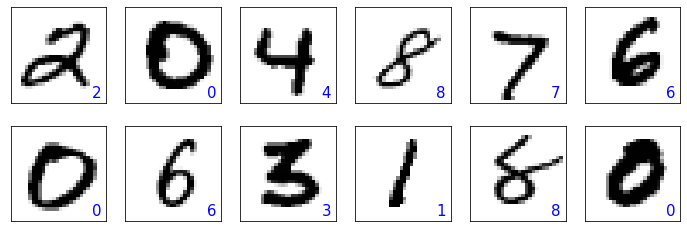

In [21]:
# We can also get the predicted class-membership probabilities using tf.argmax function
# Will do this on a batch of 12 samples

batch_test = next(iter(mnist_test.batch(12)))
print(batch_test[1])

preds = model(batch_test[0])
tf.print(preds.shape)

preds = tf.argmax(preds, axis = 1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap = 'gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]),
           size = 15, color = 'blue',
           horizontalalignment = 'center',
           verticalalignment = 'center',
           transform = ax.transAxes)
    
plt.show()


tf.Tensor(
[7 2 7 7 6 8 2 9 8 6 4 7 2 6 9 8 2 7 4 6 3 6 7 6 9 8 7 9 4 9 9 7 9 2 9 2 3
 6 5 6 7 8 7 7 5 0 9 4 5 3 0 8 7 6 8 5 5 7 8 5 6 6 5 7 1 3 1 4 6 8 2 9 5 7
 6 4], shape=(76,), dtype=int32)
tf.Tensor(
[4 3 1 2 3 9 1 5 2 8 9 9 7 8 1 0 0 2 7 0 5 1 9 0 4 2 2 5 9 7 4 2 7 0 4 7 2
 5 3 4 2 3 1 8 0 6 2 2 3 8 9 2 2 1 1 3 3 2 5 9 0 8 6 2 3 0 7 9 1 9 6 5 3 9
 8 6], shape=(76,), dtype=int32)


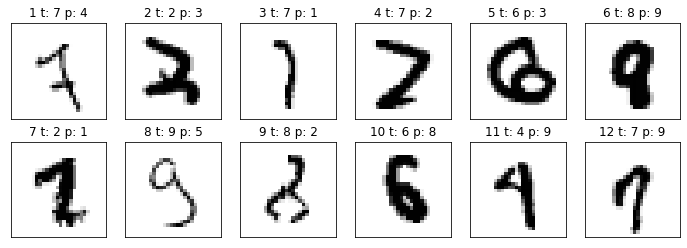

In [109]:
#Showing the images that are misclassified from a batch of 10000 images
# only 76 were misclassified from this group
# smaller batchsizes did not return enough for a 12, 4 image
# This is an unguided exercise from the book - similar to chap 12

batch_test = next(iter(mnist_test.batch(10000))) # creates a batch of the test set of 10000

preds = model(batch_test[0]) #predictions based on the images

preds = tf.argmax(preds, axis = 1) #using argmax to find the class-membership with highest prob.

preds2 = tf.dtypes.cast(preds, tf.int32) #have to cast this to int32 in order to !=

incorrect_img = batch_test[0][batch_test[1] != preds2] # = X_test[y_test != y_test_pred]
correct_lab = batch_test[1][batch_test[1] != preds2] # = y_test[y_test != y_test_pred]
print(correct_lab)

incorrect_lab = preds2[batch_test[1] != preds2] # = y_test_pred[y_test != y_test_pred]
print(incorrect_lab)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = incorrect_img[i, :, :, 0]
    ax.imshow(img, cmap = 'gray_r')
    ax.set_title('%d t: %d p: %d' % (i+1, correct_lab[i], incorrect_lab[i]))

plt.show()